In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5980,7049-GKVZY,Female,0,No,No,17,Yes,No,DSL,Yes,...,No,Yes,Yes,Yes,One year,No,Credit card (automatic),79.85,1387.35,No
6544,6661-HBGWL,Female,1,No,No,42,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.75,4323.45,Yes
4447,7821-DPRQE,Male,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,107.70,7320.9,No
2670,4531-AUZNK,Female,0,Yes,Yes,51,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,One year,Yes,Mailed check,95.15,5000.05,No
3466,9430-NKQLY,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.10,1790.8,No


---

# I. Data Cleaning

### Step 1: Bỏ đi Column(s) vô dụng

In [3]:
df.drop('customerID', axis=1, inplace = True)

### Step 2: Sửa lại Dtype của Column(s) nếu sai

In [4]:
# quan sát table và info thì thấy dtype của column TotalCharges đéo khớp!!!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') 
# lúc convert sẽ chuyển các kí tự không phải số sang NaN

### Step 3: Sửa/Xóa Row(s) chứa NaN nếu có

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
# quan sát info thấy column TotalCharges chỉ 7032 non-null trong khi có 7043 rows!!!
df.TotalCharges.isnull().sum()

11

In [8]:
df = df.dropna(subset='TotalCharges')  #  drop rows where the 'TotalCharges' column has missing values (NaNs)

---

# II. Data Visualization

In [9]:
churn_no = df[df.Churn=='No']
churn_yes = df[df.Churn=='Yes']
churn_no.shape, churn_yes.shape

((5163, 20), (1869, 20))

### 1. Correlation between Tenure & Churn

In [10]:
tenure_churn_no = churn_no.tenure
tenure_churn_yes = churn_yes.tenure

Text(0.5, 1.0, 'Correlation between Tenure & Churn')

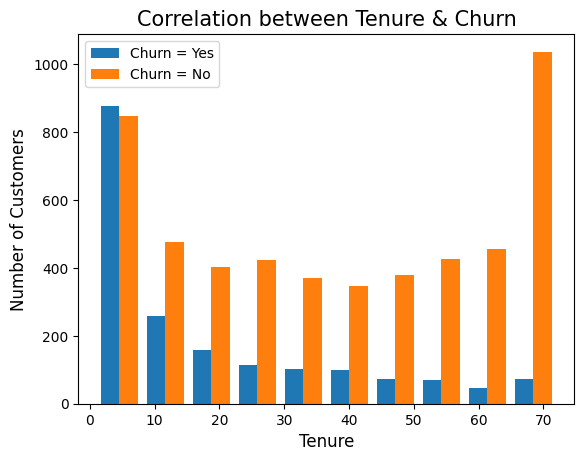

In [11]:
plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn = Yes', 'Churn = No'])
plt.legend()

plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

plt.title('Correlation between Tenure & Churn', fontsize=15)

### 2. Correlation between MonthlyCharges & Churn

In [12]:
mc_churn_no = churn_no.MonthlyCharges      
mc_churn_yes = churn_yes.MonthlyCharges      

Text(0.5, 1.0, 'Correlation between Monthly Charges & Churn')

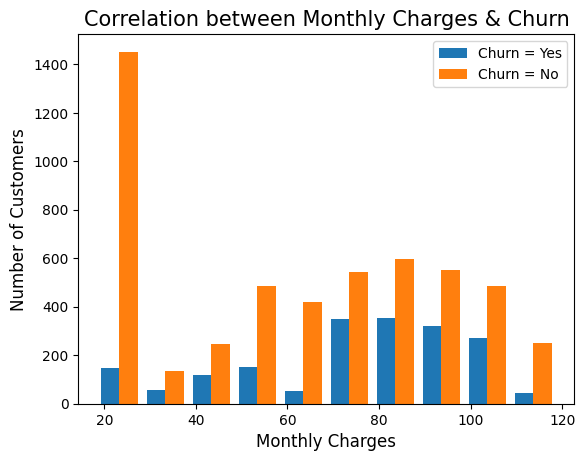

In [13]:
plt.hist([mc_churn_yes, mc_churn_no], label=['Churn = Yes', 'Churn = No'])
plt.legend()

plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

plt.title('Correlation between Monthly Charges & Churn', fontsize=15)

### 3. Correlation between InternetService & Churn

In [14]:
is_churn_no = churn_no.InternetService      
is_churn_yes = churn_yes.InternetService      

Text(0.5, 1.0, 'Correlation between Internet Service & Churn')

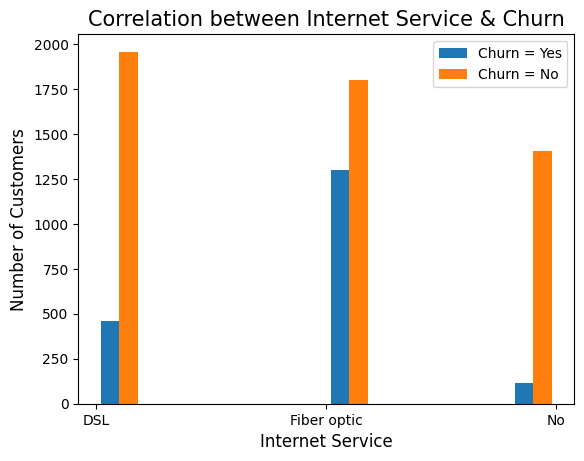

In [15]:
plt.hist([is_churn_yes, is_churn_no], label=['Churn = Yes', 'Churn = No'])
plt.legend()

plt.xlabel('Internet Service', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

plt.title('Correlation between Internet Service & Churn', fontsize=15)

---

# III. Data Transformation

### Step 1: Label Encoding

In [16]:
for i in df.columns:  # duyệt từng column
    if df[i].dtypes == 'object':
        print(f'{i}:', df[i].unique())

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [17]:
df.replace('No internet service', 'No', inplace=True)

In [18]:
df.replace('No phone service','No', inplace=True)

In [19]:
df.replace('No', 0, inplace=True)
df.replace('Yes', 1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10324\402374587.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('Yes', 1, inplace=True)


In [20]:
df.replace('Male', 1, inplace=True)
df.replace('Female', 0, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10324\4032719631.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('Female', 0, inplace=True)


### Step 2: One Hot Encoding

In [21]:
for i in df.columns:  # duyệt từng column
    if df[i].dtypes == 'object':
        print(f'{i}:', df[i].unique())

InternetService: ['DSL' 'Fiber optic' 0]
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [22]:
cols_ohe = ['InternetService', 'Contract', 'PaymentMethod']
df_dummies = pd.get_dummies(df, columns=cols_ohe, drop_first=True, dtype='int64')

In [23]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Streaming

### Step 3: Scaling

In [24]:
pd.set_option('display.max_columns', None)
df_dummies.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785,0.343572,0.440273,0.209329,0.239619,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782,0.474934,0.496455,0.406858,0.426881,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
cols_scaled = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()  # not using StandardScaler because they don't have Normal Distribution

df_dummies[cols_scaled] = scaler.fit_transform(df_dummies[cols_scaled])

In [26]:
for i in df_dummies.columns:  # duyệt từng column
    print(f'{i}:', df_dummies[i].unique())

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

---

# IV. Preparing Data and Model

### Step 1: Splitting Data

In [27]:
X = df_dummies.drop('Churn', axis=1)
Y = df_dummies.Churn
X.shape, Y.shape

((7032, 23), (7032,))

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5625, 23), (5625,), (1407, 23), (1407,))

In [29]:
Y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [30]:
Y_train.value_counts()

Churn
0    4125
1    1500
Name: count, dtype: int64

### Step 2: Building a Model

In [31]:
def neural_network(X_train, y_train, X_test, y_test, loops=25):
    # build model
    model = keras.Sequential([
        keras.layers.Input(shape=(23, ), batch_size=56),
        keras.layers.Dense(19, activation='relu'),
        #keras.layers.Dropout(0.3),
        keras.layers.Dense(7, activation='relu'),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
    )

    # train model
    model.fit(X_train, y_train, epochs=loops)

    # predict
    probability = model.predict(X_test)
    yp_test = np.where(probability > 0.5, 1, 0)

    # evaluate
    cm = confusion_matrix(y_test, yp_test)
    report = classification_report(y_test, yp_test)
    
    return cm, report, yp_test

### Step 3: Plotting a Confusion Matrix

In [32]:
def plot_cm(cm):
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Truth', fontsize=12)
    plt.title('Confusion Matrix')
    plt.show()

---

# V. Training an Imbalanced Dataset

In [33]:
Y_train.value_counts()  # an imbalanced training set

Churn
0    4125
1    1500
Name: count, dtype: int64

In [34]:
cm1, report1, Yp1_test = neural_network(X_train, Y_train, X_test, Y_test)

Epoch 1/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4648 - loss: 0.7499
Epoch 2/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7744 - loss: 0.4962
Epoch 3/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7979 - loss: 0.4372
Epoch 4/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7903 - loss: 0.4351
Epoch 5/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 0.4224
Epoch 6/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7979 - loss: 0.4248
Epoch 7/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8036 - loss: 0.4230
Epoch 8/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.4091
Epoch 9/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.4062
Epoch 10/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8118 - loss: 0.4051
Epoch 11/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8036 - loss: 0.4119
Epoch 12/25
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.65      0.53      0.58       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



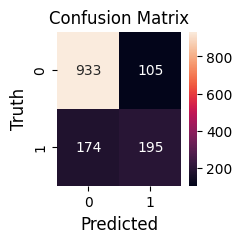

In [35]:
print(report1)  # precision, recall, f1-score of class 1 are too low
plot_cm(cm1)

---

# VI. Handling an Imbalanced Dataset

In [36]:
train = pd.concat([X_train, Y_train],axis=1)

In [37]:
train_0 = train[train.Churn==0]
train_1 = train[train.Churn==1]
train_0.shape, train_1.shape

((4125, 24), (1500, 24))

### Method 1: Undersampling the Majority Class

In [38]:
train_0_underSample = train_0.sample(1500, random_state=0)
train_0_underSample.shape

(1500, 24)

In [39]:
train_underSample = pd.concat([train_0_underSample, train_1], axis=0)  # nối rows
train_underSample.shape

(3000, 24)

In [40]:
X_train_underSample = train_underSample.drop('Churn', axis=1)
Y_train_underSample = train_underSample.Churn
X_train_underSample.shape, Y_train_underSample.shape

((3000, 23), (3000,))

In [41]:
Y_train_underSample.value_counts()

Churn
0    1500
1    1500
Name: count, dtype: int64

In [42]:
cm2, report2, Yp2_test = neural_network(X_train_underSample, Y_train_underSample, X_test, Y_test)

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6148 - loss: 0.6640
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7146 - loss: 0.5753
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7292 - loss: 0.5420
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7441 - loss: 0.5110
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7596 - loss: 0.4921
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7677 - loss: 0.4897
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7530 - loss: 0.5100
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7784 - loss: 0.4671
Epoch 9/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7792 - loss: 0.4783
Epoch 10/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7824 - loss: 0.4686
Epoch 11/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 0.4673
Epoch 12/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7693 - lo

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1038
           1       0.54      0.72      0.62       369

    accuracy                           0.77      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.77      0.78      1407



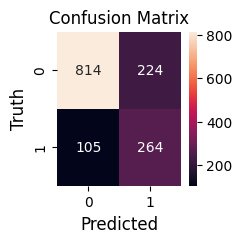

In [43]:
print(report2)
plot_cm(cm2)

### Method 2: Oversampling the Minority Class using Duplicates

In [44]:
train1_overSample = train_1.sample(4125, replace=True, random_state=0)
train1_overSample.shape

(4125, 24)

In [45]:
train_overSample = pd.concat([train_0, train1_overSample], axis=0)
train_overSample.shape

(8250, 24)

In [46]:
X_train_overSample = train_overSample.drop('Churn',axis=1)
Y_train_overSample = train_overSample.Churn
X_train_overSample.shape, Y_train_overSample.shape

((8250, 23), (8250,))

In [47]:
Y_train_overSample.value_counts()

Churn
0    4125
1    4125
Name: count, dtype: int64

In [48]:
cm3, report3, Yp3_test = neural_network(X_train_overSample, Y_train_overSample, X_test, Y_test)

Epoch 1/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6052 - loss: 0.6661
Epoch 2/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7606 - loss: 0.4994
Epoch 3/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7739 - loss: 0.4761
Epoch 4/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7732 - loss: 0.4771
Epoch 5/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7674 - loss: 0.4801
Epoch 6/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7672 - loss: 0.4828
Epoch 7/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7713 - loss: 0.4795
Epoch 8/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7727 - loss: 0.4698
Epoch 9/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7794 - loss: 0.4659
Epoch 10/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7762 - loss: 0.4677
Epoch 11/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7863 - loss: 0.4590
Epoch 12/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1038
           1       0.55      0.72      0.62       369

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.78      1407



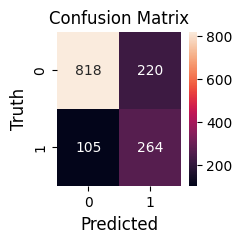

In [49]:
print(report3)
plot_cm(cm3)

### Method 3: SMOTE (Synthetic Minority Over-sampling)

In [50]:
from imblearn.over_sampling import SMOTE
# IMBalanced-LEARN

In [51]:
# using K-nearest Neighbours
smote = SMOTE(sampling_strategy='minority', random_state=0, k_neighbors=5)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [52]:
Y_train_smote.value_counts()

Churn
0    4125
1    4125
Name: count, dtype: int64

In [53]:
cm4, report4, Yp4_test = neural_network(X_train_smote, Y_train_smote, X_test, Y_test)

Epoch 1/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6460 - loss: 0.6201
Epoch 2/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7720 - loss: 0.4835
Epoch 3/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7799 - loss: 0.4657
Epoch 4/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7784 - loss: 0.4630
Epoch 5/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7815 - loss: 0.4574
Epoch 6/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4592
Epoch 7/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7985 - loss: 0.4353
Epoch 8/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7898 - loss: 0.4446
Epoch 9/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7927 - loss: 0.4432
Epoch 10/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7998 - loss: 0.4420
Epoch 11/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7927 - loss: 0.4460
Epoch 12/25
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1038
           1       0.52      0.74      0.61       369

    accuracy                           0.75      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407



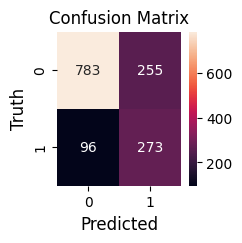

In [54]:
print(report4)
plot_cm(cm4)

### Method 4: Ensemble + Under-sampling

In [55]:
train.Churn.value_counts()

Churn
0    4125
1    1500
Name: count, dtype: int64

In [56]:
4125/1500

2.75

In [57]:
4125/3

1375.0

In [58]:
train_0.shape, train_1.shape

((4125, 24), (1500, 24))

In [59]:
def get_training_batch(start, end):
    train_0_underSample = train_0.iloc[start:end]
    
    train_underSample = pd.concat([train_0_underSample, train_1], axis=0)
    
    X_train_underSample = train_underSample.drop('Churn',axis=1)
    Y_train_underSample = train_underSample.Churn
    
    return X_train_underSample, Y_train_underSample

In [60]:
x1_train, y1_train = get_training_batch(0, 1375)
a, b, yp1_test = neural_network(x1_train, y1_train, X_test, Y_test)

Epoch 1/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6800 - loss: 0.6431
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7383 - loss: 0.5607
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7624 - loss: 0.5007
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7732 - loss: 0.4789
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7675 - loss: 0.4899
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7728 - loss: 0.4687
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7691 - loss: 0.4839
Epoch 8/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7727 - loss: 0.4865
Epoch 9/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7716 - loss: 0.4816
Epoch 10/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7617 - loss: 0.4883
Epoch 11/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7752 - loss: 0.4754
Epoch 12/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7783 - lo

In [61]:
x2_train, y2_train = get_training_batch(1375, 1375*2)
a, b, yp2_test = neural_network(x2_train, y2_train, X_test, Y_test)

Epoch 1/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5521 - loss: 0.6961
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7320 - loss: 0.5965
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7201 - loss: 0.5452
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7471 - loss: 0.5120
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - loss: 0.5008
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7618 - loss: 0.4861
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7554 - loss: 0.4941
Epoch 8/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7580 - loss: 0.4888
Epoch 9/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7646 - loss: 0.4866
Epoch 10/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7492 - loss: 0.5084
Epoch 11/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7662 - loss: 0.4921
Epoch 12/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7659 - lo

In [62]:
x3_train, y3_train = get_training_batch(1375*2, 1375*3)
a, b, yp3_test = neural_network(x3_train, y3_train, X_test, Y_test)

Epoch 1/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5218 - loss: 0.7322
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6311 - loss: 0.6253
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7361 - loss: 0.5551
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7372 - loss: 0.5293
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7485 - loss: 0.5064
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7568 - loss: 0.4988
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7530 - loss: 0.5076
Epoch 8/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - loss: 0.4843
Epoch 9/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.4783
Epoch 10/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 0.4969
Epoch 11/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7555 - loss: 0.4849
Epoch 12/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7555 - lo

In [63]:
yp1_test.shape, yp2_test.shape, yp3_test.shape

((1407, 1), (1407, 1), (1407, 1))

In [64]:
Yp_test_ensemble = []

for i in range(len(yp1_test)):
    sum = yp1_test[i] + yp2_test[i] + yp3_test[i]  # min = 0, max = 3
    
    if sum >=2:
        Yp_test_ensemble.append(1)  # ít nhất 2 lần số 1 xuất hiện ==> là 1
    else:
        Yp_test_ensemble.append(0)

In [65]:
Yp_test_ensemble = np.array(Yp_test_ensemble)
Yp_test_ensemble.shape

(1407,)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1038
           1       0.50      0.80      0.61       369

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.73      0.75      1407



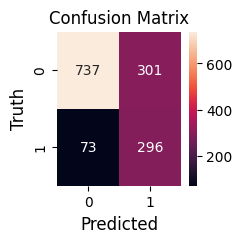

In [66]:
cm5 = confusion_matrix(Y_test, Yp_test_ensemble)
report5 = classification_report(Y_test, Yp_test_ensemble)

print(report5)
plot_cm(cm5)

### Method 5: Focal Loss

---

# VII. Summary

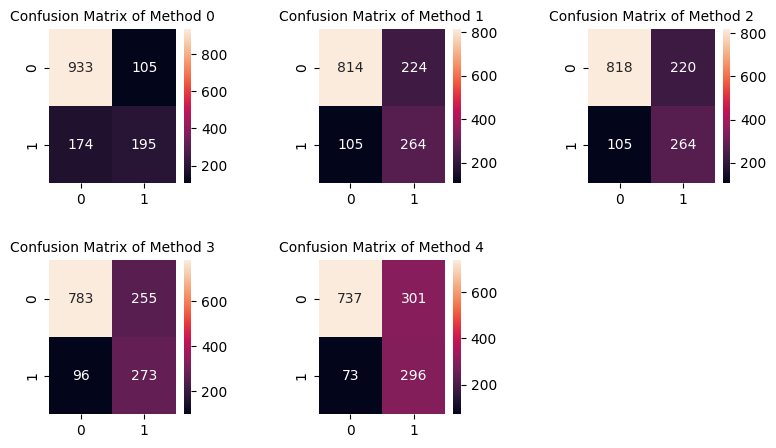

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
fig.subplots_adjust(wspace=0.7, hspace=0.5)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each confusion matrix
cms = [cm1, cm2, cm3, cm4, cm5]
for i in range(5):
    plt.sca(axes[i])  # Set the current axis
    sns.heatmap(cms[i], annot=True, fmt='d')
    plt.title('Confusion Matrix of Method {}'.format(i), fontsize=10)
    
# Remove any empty subplots
fig.delaxes(axes[5])

#fig.tight_layout()  # ensures that the subplots are spaced evenly and do not overlap
plt.show()